# Imports

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

#print(tf.__version__)

# Load training dataset

In [22]:
training_set = pd.read_parquet("training_set.parquet")
print(f"Number of training matches: {training_set.shape[0]}")
training_set.head()

Number of training matches: 299214


,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL
0,00-01,GER1,11/08/2000,Dortmund,Hansa Rostock,1,0,1,W
1,00-01,GER1,12/08/2000,Bayern Munich,Hertha Berlin,4,1,3,W
2,00-01,GER1,12/08/2000,Freiburg,VfB Stuttgart,4,0,4,W
3,00-01,GER1,12/08/2000,Hamburger SV,Munich 1860,2,2,0,D
4,00-01,GER1,12/08/2000,Kaiserslautern,Bochum,0,1,-1,L


In [23]:
# Order dataset by date from older to more recent matches
training_set["Date"] = pd.to_datetime(training_set["Date"], format="%d/%m/%Y")
training_set = training_set.sort_values(by=["Date"])
# Total goals in the match = HS + AS
training_set["Goals"] = training_set["HS"] + training_set["AS"]
# Drop invalid games (with negative total goals)
training_set = training_set.drop(training_set[training_set["Goals"] < 0].index)
training_set

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
7102,00-01,CHN1,2000-03-19,Dalian Haichang,Beijing Guoan,2,0,2,W,2
7103,00-01,CHN1,2000-03-19,Qingdao,Shanghai Greenland,1,1,0,D,2
7108,00-01,CHN1,2000-03-19,Xiamen Xiaxin,Liaoning,3,0,3,W,3
7106,00-01,CHN1,2000-03-19,Shenzhen FC,Sichuan Guancheng,0,0,0,D,0
7105,00-01,CHN1,2000-03-19,Guangzhou Rich and Force,Chongqing Lifan,0,0,0,D,0
...,...,...,...,...,...,...,...,...,...,...
299041,22-23,TUN1,2023-02-08,EO Sidi Bouzid,ES Metlaoui,3,4,-1,L,7
299040,22-23,TUN1,2023-02-08,ES Sahel,CA Bizertin,0,2,-2,L,2
299039,22-23,TUN1,2023-02-08,US Ben Guerdane,Soliman,2,2,0,D,4
299037,22-23,TUN1,2023-02-08,Stade Tunisien,US Tataouine,2,1,1,W,3


# Explore training dataset

In [4]:
seasons = training_set["Sea"].value_counts()
print(f"Top 5 seasons with most matches in dataset: \n{seasons[:5]}")
print("-----------")
print(f"Top 5 seasons with least matches in dataset: \n{seasons[-5:]}")

Top 5 seasons with most matches in dataset: 
14-15    15472
16-17    15459
13-14    15358
12-13    15268
21-22    15241
Name: Sea, dtype: int64
-----------
Top 5 seasons with least matches in dataset: 
03-04    9520
02-03    8886
01-02    8380
00-01    8186
23-24     101
Name: Sea, dtype: int64


### W/D/L study

In [17]:
total_matches = training_set.shape[0]

# Home wins
home_wins = training_set["WDL"].value_counts()["W"]
home_wins_percentage = round(100 * home_wins / total_matches, 5)
print(f"Number of home wins: {home_wins} ({home_wins_percentage} %)")

# Draws
draws = training_set["WDL"].value_counts()["D"]
draws_percentage = round(100 * draws / total_matches, 5)
print(f"Number of draws: {draws} ({draws_percentage} %)")

# Away wins
away_wins = training_set["WDL"].value_counts()["L"]
away_wins_percentage = round(100 * away_wins / total_matches, 5)
print(f"Number of away wins: {away_wins} ({away_wins_percentage} %)")

Number of home wins: 134167 (44.83981 %)
Number of draws: 80878 (27.03015 %)
Number of home wins: 84169 (28.13003 %)


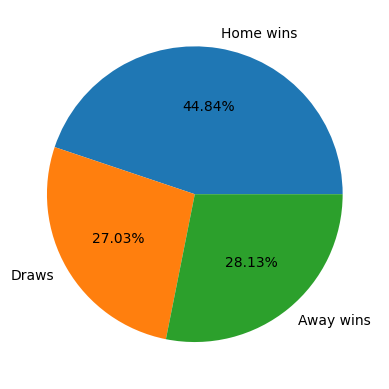

In [29]:
labels = "Home wins", "Draws", "Away wins"
sizes = [home_wins_percentage, draws_percentage, away_wins_percentage]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%');

### Goals study

In [18]:
avg_home_goals = round(training_set["HS"].mean(), 5)
avg_away_goals = round(training_set["AS"].mean(), 5)
avg_goal_difference = round(training_set["GD"].mean(), 5)
print(f"Average goals by home team: {avg_home_goals}")
print(f"Average goals by away team: {avg_away_goals}")
print(f"Average goal difference: {avg_goal_difference}")

Average goals by home team: 1.47164
Average goals by away team: 1.12139
Average goal difference: 0.35025


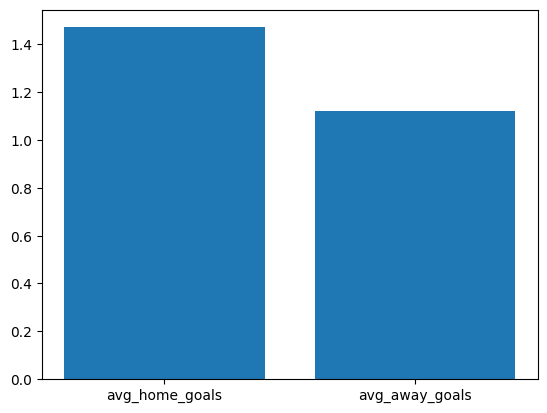

In [65]:
plt.bar(["avg_home_goals", "avg_away_goals"], height=[avg_home_goals, avg_away_goals]);

In [66]:
home_teams_list = training_set["HT"].unique().tolist()
away_teams_list = training_set["AT"].unique().tolist()
teams_list = list(set(home_teams_list + away_teams_list))
print(len(home_teams_list), len(away_teams_list), len(teams_list))
teams_list

1636 1636 1637


['Koblenz',
 'Jendouba Sport',
 'Tondela',
 'Olympique Lyonnais',
 'Melbourne Knights',
 'Stockport',
 'FC Schaffhausen',
 'Elche',
 'Tenerife',
 'San Antonio Scorpions',
 'Southend',
 'Shanghai Greenland',
 'Roma',
 'Athletic Bilbao B',
 'Ajax Cape Town',
 'AC Ajaccio',
 'Akron',
 'Jeju United',
 'Ravenna',
 'Oued Zem',
 'Harrisburg City Islanders',
 'Shanghai Shenxin',
 'Hansa Rostock',
 'Tottenham Hotspur',
 'Rio Grande Valley FC',
 'Granada',
 'Alfreton Town',
 'Deportivo Rayo Zuliano',
 'Minerven FC',
 'Yiannina',
 'Munich 1860',
 'Bochum',
 'Shinnik Yaroslavl',
 'Grasshoppers Zurich',
 'Uerdingen',
 'IK Start',
 'Aalst',
 'Alcoyano',
 'Seinajoki',
 'FC Sudtirol',
 'Shanghai SIPG',
 'Beitar Jerusalem',
 'Briochin',
 'Grazer AK',
 'Hangzhou Greentown',
 'Inverness CT',
 'FK Tom Tomsk',
 'Deportivo Zulia',
 'Sagan Tosu',
 'Sassuolo',
 'Hertha Berlin',
 'Angers SCO',
 'Herfolge',
 'Jubilo Iwata',
 'Frosinone',
 'Walsall',
 'Yanbian FC',
 'Torpedo Moscow',
 'Aldershot',
 'Gubbio',
 'C

In [77]:
teams = list()
team_stats = {"name": None,
                "wins": None,
                "draws": None,
                "losses": None,
                "win_percentage": None,
                "draw_percentage": None,
                "loss_percentage": None,
                "home_wins": None,
                "home_draws": None,
                "home_losses": None,
                "home_win_percentage": None,
                "home_draw_percentage": None,
                "home_loss_percentage": None,
                "away_wins": None,
                "away_draws": None,
                "haway_losses": None,
                "away_win_percentage": None,
                "away_draw_percentage": None,
                "away_loss_percentage": None,
                "goals_scored": None,
                "goals_against": None,
                "goals_difference": None,
                "avg_goals_scored": None,
                "avg_goals_against": None,
                "avg_goals_difference": None,
                "home_goals_scored": None,
                "home_goals_against": None,
                "home_goals_difference": None,
                "home_avg_goals_scored": None,
                "home_avg_goals_against": None,
                "home_avg_goals_difference": None,
                "away_goals_scored": None,
                "away_goals_against": None,
                "away_goals_difference": None,
                "away_avg_goals_scored": None,
                "away_avg_goals_against": None,
                "away_avg_goals_difference": None,

                }

def extract_team_df(team_name):
    ''' Extracts games of a specific team.
    '''
    
    home_team_df = training_set[training_set["HT"] == team_name]
    away_team_df = training_set[training_set["AT"] == team_name]

    team_games_filter = np.where((training_set["HT"] == team_name) | \
        (training_set["AT"] == team_name))
    team_df = training_set.loc[team_games_filter]
    
    return team_df, home_team_df, away_team_df


In [78]:
def complete_team_info(team_name): 

    team_df, home_team_df, away_team_df = extract_team_df(team_name)

    team_stats = dict()
    team_stats["name"] = team_name
    home_stats = get_stats(home_team_df, local=True)

    return team_stats

In [76]:
perro = {"name": "Juan", "apellido": None}
gato = {"name": None, "apellido": "Ruiz"}
z = dict(list(gato.items()) + list(perro.items())) 
z

{'name': 'Juan', 'apellido': None}

In [93]:
def get_stats(df, local=True):

    team_stats = dict()
    if local is True:
        prefix = "home"
        goals_scored_col = "HS"
        goals_against_col = "AS"
        win, loss = "W", "L"
    else: 
        prefix = "away"
        goals_scored_col = "AS"
        goals_against_col = "HS"
        win, loss = "L", "W"
    
    team_stats[f"{prefix}_games"] = df.shape[0]
    team_stats[f"{prefix}_wins"] = df["WDL"].value_counts()[win]
    team_stats[f"{prefix}_draws"] = df["WDL"].value_counts()["D"]
    team_stats[f"{prefix}_losses"] = df["WDL"].value_counts()[loss]
    team_stats[f"{prefix}_win_percentage"] = round(df["WDL"].value_counts()[win] / df.shape[0], 3)
    team_stats[f"{prefix}_draw_percentage"] = round(df["WDL"].value_counts()["D"] / df.shape[0], 3)
    team_stats[f"{prefix}_loss_percentage"] = round(df["WDL"].value_counts()[loss] / df.shape[0], 3)
    team_stats[f"{prefix}_goals_scored"] = df[goals_scored_col].sum()
    team_stats[f"{prefix}_goals_against"] = df[goals_against_col].sum()
    team_stats[f"{prefix}_goals_difference"] = df["GD"].sum()

    return team_stats

In [94]:
get_stats(bay_home)

{'home_games': 383,
 'home_wins': 294,
 'home_draws': 60,
 'home_losses': 29,
 'home_win_percentage': 0.768,
 'home_draw_percentage': 0.157,
 'home_loss_percentage': 0.076,
 'home_goals_scored': 1050,
 'home_goals_against': 304,
 'home_goals_difference': 746}

In [95]:
get_stats(bay_away, local=False)

{'away_games': 384,
 'away_wins': 228,
 'away_draws': 80,
 'away_losses': 76,
 'away_win_percentage': 0.594,
 'away_draw_percentage': 0.208,
 'away_loss_percentage': 0.198,
 'away_goals_scored': 756,
 'away_goals_against': 372,
 'away_goals_difference': -384}

In [85]:
bay_home

,Sea,Lge,Date,HT,AT,HS,AS,GD,WDL,Goals
1,00-01,GER1,2000-08-12,Bayern Munich,Hertha Berlin,4,1,3,W,5
22,00-01,GER1,2000-09-06,Bayern Munich,Wolfsburg,3,1,2,W,4
37,00-01,GER1,2000-09-16,Bayern Munich,Unterhaching,3,1,2,W,4
55,00-01,GER1,2000-09-30,Bayern Munich,Hansa Rostock,0,1,-1,L,1
73,00-01,GER1,2000-10-21,Bayern Munich,Munich 1860,3,1,2,W,4
...,...,...,...,...,...,...,...,...,...,...
296068,22-23,GER1,2022-10-16,Bayern Munich,Freiburg,5,0,5,W,5
296079,22-23,GER1,2022-10-29,Bayern Munich,Mainz 05,6,2,4,W,8
296097,22-23,GER1,2022-11-08,Bayern Munich,Werder Bremen,6,1,5,W,7
296124,22-23,GER1,2023-01-24,Bayern Munich,FC Koln,1,1,0,D,2


In [ ]:
def get_last_n_matches_result(team_name, n_previous_matches):

    team_df, _, _= extract_team_df(team_name)
    last_n_games_df = team_df[-n_previous_matches:]

    return last_n_games_df